[![Open In Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/lzanda/demo_amazon_sagemaker_studio_lab/blob/main/CNN-Mario/CCN-Mario.ipynb)
# Clasificación de imagenes con Redes Neuronales Convolucionales

## Antecedentes

La clasificación de imágenes (o reconocimiento de imágenes) es un subdominio de la visión por computadora en el que un algoritmo mira una imagen y le asigna una etiqueta de una colección de etiquetas o categorías predefinidas en las que se ha entrenado.

La visión es responsable del 80-85 por ciento de nuestra percepción del mundo, y nosotros, como seres humanos, realizamos diariamente clasificaciones triviales de cualquier información con la que nos encontremos.

Por lo tanto, emular una tarea de clasificación con la ayuda de redes neuronales es uno de los primeros usos de la visión artificial en los que pensaron los investigadores.


## Clasificación de niveles Super Mario Bros (Data set)
En este ejercicio se explorará la utilidad y funcionamiento de las redes convolucionales para clasificar diferentes niveles del juego de atari Super Mario bros a partir de imágenes del mismo.<br>


El dataset disponible contiene imágenes de los niveles: 1,5,6,7 de Super Mario bros a clasificar. Este se encuentra en la carpeta Dataset del mismo repositorio en Github ( https://github.com/lzanda/demo_amazon_sagemaker_studio_lab ) Cada dato contiene una imagen estática de alguna parte de cualquiera de las etapas del nivel o clase en cuestión. Vale la pena aclarar que cada uno de los niveles contiene cuatro etapas diferentes en donde varía el entorno, los obstaculos y los enemigos a los cuales se debe enfrentar Mario. 

![Imagen Mario](Dataset/imagenMario.png)

## Steps in this notebook

Los pasos principales son:
- instalar paquetes
- cargar conjunto de datos, qué estan divididos en entrenamiento, testeo y validación
- Visualización de 2 imagen del conjunto de datos 
- Importación de imagenes con ayuda de OpenCV
- iniciar el modelo NN
- entrenar un modelo con config
- probar un modelo
- imprimir una figura con la predición que se obtiene apartir del modelo entrenado

## Instalación de paquetes necesarios:

In [13]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym-super-mario-bros > /dev/null 2>&1
%conda install opencv

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/studio-lab-user/.conda/envs/cv

  added / updated specs:
    - opencv


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    alsa-lib-1.2.3             |       h516909a_0         560 KB  conda-forge
    aom-3.2.0                  |       h9c3ff4c_2         5.4 MB  conda-forge
    c-ares-1.18.1              |       h7f98852_0         113 KB  conda-forge
    cairo-1.16.0               |    ha00ac49_1009         1.5 MB  conda-forge
    dbus-1.13.6                |       h5008d03_3         604 KB  conda-forge
    expat-2.4.4                |       h9c3ff4c_0         183 KB  conda-forge
    ffmpeg-4.4.1               |       h6987444_0        10.0 MB  co

In [4]:
# Importación de paquetes necesarios 
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from IPython.display import clear_output
import time

## Visualización de Imagenes del Dataset
_A tener en cuenta:_ La sintaxis del ambiente de Mario Bros es:

'SuperMarioBros-Nivel-Etapa-v0'

En donde cada nivel cuenta con 4 etapas por separado y el ambiente un total de 8 niveles. Para este problema en especifico, solo manejaremos los niveles 1,5,6 y 8. 


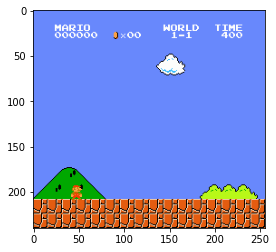

In [5]:
# Imagen del nivel 1 - Etapa 1
env = gym_super_mario_bros.make('SuperMarioBros-1-1-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
state = env.reset()
state, reward, done, info = env.step(env.action_space.sample())
screen = env.render(mode='rgb_array')
plt.imshow(screen)
env.close()

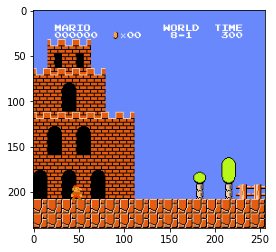

In [7]:
# Imagen del nivel 8 - Etapa 1
env = gym_super_mario_bros.make('SuperMarioBros-8-1-v0') 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
state = env.reset()
state, reward, done, info = env.step(env.action_space.sample())
screen = env.render(mode='rgb_array') # borrar
plt.imshow(screen) # borrar
env.close()

## Importar dataset con OpenCV
En primer lugar es importante importar la base de datos adjunta al notebook presente para poder resolver el problema de clasificación.  De forma adicional y paralelamente se creará un vector de etiquetas (**_Y_**) que contenga la clase a la que pertenece cada imagen:

- Clase 0 -> Nivel 1
- Clase 1 -> Nivel 5
- Clase 2 -> Nivel 6
- Clase 3 -> Nivel 8

In [14]:
# Importación de los paquetes necesario para: Import Dataset
import cv2
import random
import os
import numpy as np